In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [2]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [3]:
student = pd.read_csv('/Users/jeandre/DataScience874/PostBlockAssignment3/StudentsPerformance.csv')

In [4]:
student.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


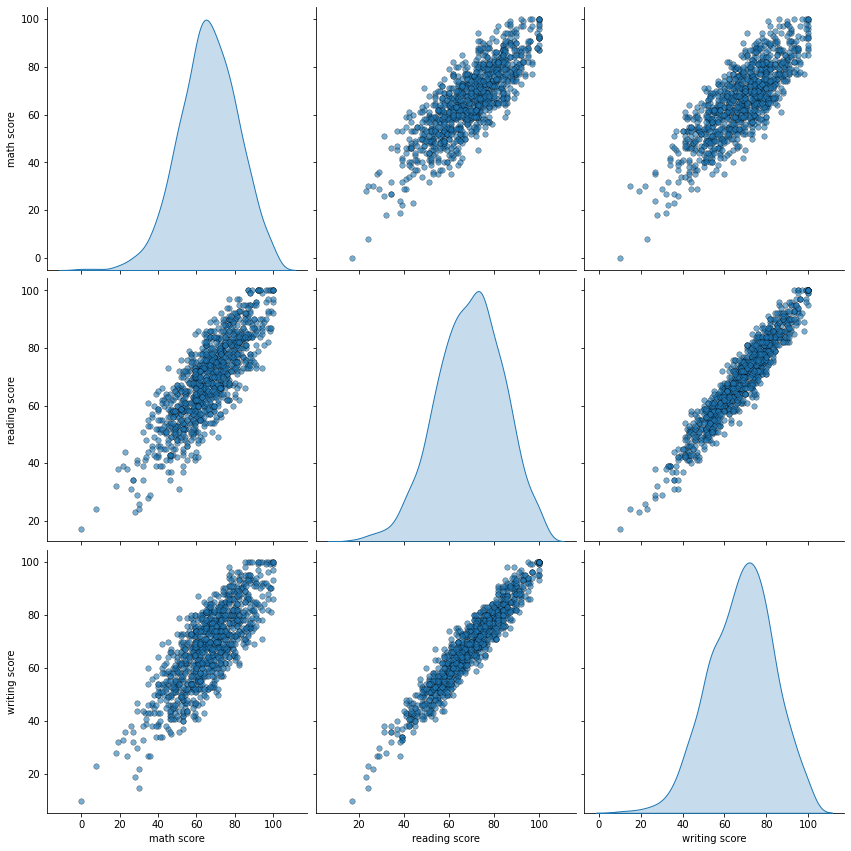

In [5]:
sns.pairplot(student, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'},height = 4)

#### Very strong correlation between the three scores

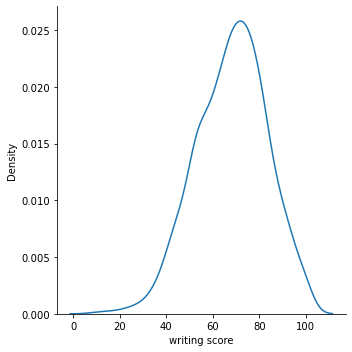

In [6]:
sns.displot(data = student, x = "writing score", kind = "kde" )

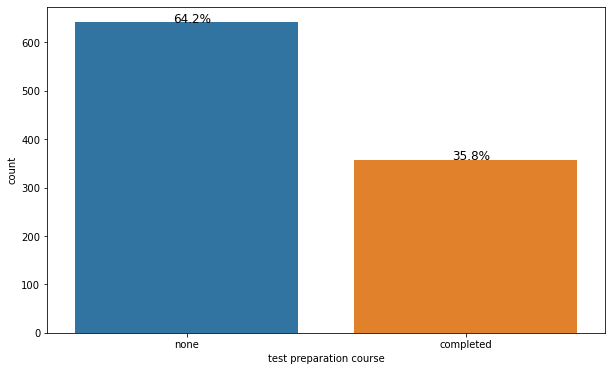

In [7]:
dims = (10,6)
fig, ax = pyplot.subplots(figsize=dims)
sns.countplot(data = student, x = "test preparation course" )
without_hue(ax,student["test preparation course"])

In [8]:
student['average'] = student.mean(numeric_only=True, axis=1)
student.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


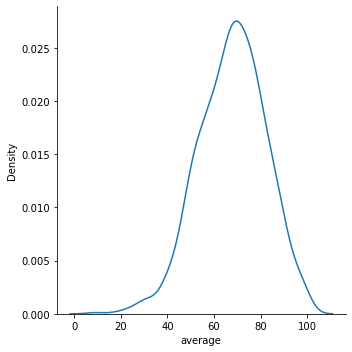

In [9]:
sns.displot(data = student, x = "average", kind = "kde" ) # distribution of "average feature"

In [10]:
dummy_gender = pd.get_dummies(student['gender'],drop_first=True)
dummy_race = pd.get_dummies(student['race/ethnicity'],drop_first=True)
dummy_education = pd.get_dummies(student['parental level of education'],drop_first=True)
dummy_lunch = pd.get_dummies(student['lunch'],drop_first=True)
dummy_test = pd.get_dummies(student['test preparation course'],drop_first=True)

## Making dummy coding for the categorical input features

In [11]:
X = dummy_gender.merge(dummy_race,left_index=True, right_index=True)
X = X.merge(dummy_education,left_index=True, right_index=True)
X = X.merge(dummy_lunch,left_index=True, right_index=True)
X = X.merge(dummy_test,left_index=True, right_index=True)
X.head(2)

,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0


 ### binning the avergae score above and below the value of 68.
 ### 68 is the median and mean of the avergae score.

In [12]:
Y = pd.cut(student['average'],bins=[0,68,100],labels=[0,1])
Y.head(4) 

0    1
1    1
2    1
3    0
Name: average, dtype: category
Categories (2, int64): [0 < 1]

In [13]:
labels = [0,1] #making labels for confusion matrix plotting

In [14]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

#### Adding the 10 randomly selected test samples to a prediction set

In [15]:
prediction_set = []
answer_set = []
for i in range(10):
    x = np.random.randint(200)
    print("entry added = ",x)
    prediction_set.append(np.asarray(X_test.iloc[[x]]))
    answer_set.append(np.asarray(Y_test.iloc[[x]]))

entry added =  139
entry added =  100
entry added =  47
entry added =  136
entry added =  134
entry added =  147
entry added =  127
entry added =  188
entry added =  92
entry added =  96


## Linear Regression

Accuracy score = 0.64
Precision score = 0.6402720272027203
Recall =  0.64
 
10 Predicted values: 
1 <-answer : predicted-> [1]
0 <-answer : predicted-> [1]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [1]
1 <-answer : predicted-> [1]
0 <-answer : predicted-> [0]
1 <-answer : predicted-> [1]
1 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]


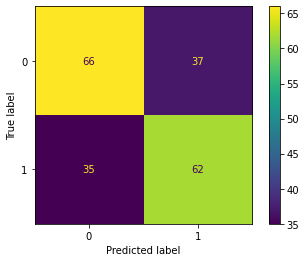

In [16]:
results = []
linreg = LogisticRegression().fit(X_train, Y_train)
R_pred = linreg.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,R_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,R_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,R_pred,average='weighted'))
print(" \n10 Predicted values: ")
for i in range(len(prediction_set)):
    print(answer_set[i][0],"<-answer : predicted->",linreg.predict(prediction_set[i]))
sklearn.metrics.plot_confusion_matrix(linreg,X_test,Y_test,display_labels=labels)

## Gaussian Naive Bayes

Accuracy score = 0.665
Precision score = 0.6704817487266552
Recall =  0.665
 
10 Predicted values: 
1 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [1]
1 <-answer : predicted-> [1]
0 <-answer : predicted-> [0]
1 <-answer : predicted-> [1]
1 <-answer : predicted-> [1]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]


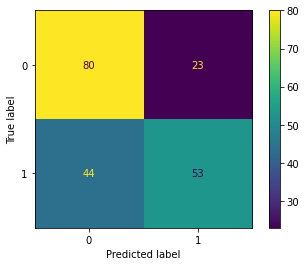

In [17]:
results = []
nb = GaussianNB()
nb.fit(X_train,Y_train)
N_pred = nb.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,N_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,N_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,N_pred,average='weighted'))

print(" \n10 Predicted values: ")
for i in range(len(prediction_set)):
    print(answer_set[i][0],"<-answer : predicted->",nb.predict(prediction_set[i]))

sklearn.metrics.plot_confusion_matrix(nb,X_test,Y_test,display_labels=labels)

## KNN


Accuracy score = 0.595
Precision score = 0.595026683087028
Recall =  0.595
 
10 Predicted values: 
1 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [1]
1 <-answer : predicted-> [1]
0 <-answer : predicted-> [0]
1 <-answer : predicted-> [1]
1 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]
0 <-answer : predicted-> [0]


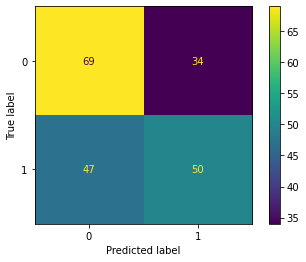

In [18]:
results = []
k = 8
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,Y_train)
K_pred = neigh.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,K_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,K_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,K_pred,average='weighted'))

print(" \n10 Predicted values: ")
for i in range(len(prediction_set)):
    print(answer_set[i][0],"<-answer : predicted->",neigh.predict(prediction_set[i]))

sklearn.metrics.plot_confusion_matrix(neigh,X_test,Y_test,display_labels=labels)
